# Collaboration and Competition

---


### 1. Start the Environment


In [9]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import deque
from ddpg_agent import Agent

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64//tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [12]:
env.close()

### 4. Training the Agents

The following section trains the agents.   To run the following code, ensure "model.py" and "ddpg_agent.py" are located in the same folder as this notebook.   model.py sets up the Actor and Critic neural networks and ddpg_agent.py contains the ddpg algorithm which calls on the neural networks in model.py.

Tweak the hyper-parameters in this section, the network architecture in the model.py or the hyper-paremeters in ddpg_agent.py to see how they alter the training performance.

In [7]:
def ddpg(n_episodes=2000, max_ts=1000):
    
    # Set-up variables
    scores_deque = deque(maxlen=100)   # a deque of scores
    cum_score = []      # stores the sequence of scores.  Return this list.
    print_episodes = 50 # print results every x episodes
    random_seed = 8
    
    # Hyper-parameters
    learn_steps = 10  # go x number of steps and then learn
    learning_episodes = 20  # everytime the agent learns,  learn x episodes
    batch_size = 128   # batch size for learning

    # Create agent
    agent = Agent(num_agents, state_size, action_size, random_seed, batch_size)
    print("\nlearn_steps : {}  batch_size : {}  learn_episode : {}  seed : {}\n"
          .format(learn_steps, batch_size, learning_episodes, random_seed))

    for i_episode in range(1, n_episodes + 1):

        # This section reset environment and parameters for a new episode        
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment because this is a new episode
        states = env_info.vector_observations  # get the current state (for each agent) because this is a new episode
        scores = np.zeros(num_agents)  # initialize the score (for each agent) because this is a new episode
        agent.reset()  # reset noise

        for t_step in range(max_ts):
            actions = agent.act(states)

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations  # get next state (for each agent)
            rewards = env_info.rewards  # get reward (for each agent)
            dones = env_info.local_done  # see if episode finished

            # Store experience in replay buffer memory
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.memory.add(state, action, reward, next_state, done)

            # Learn every learn_steps and if there are enough experience in the memory
            if t_step % learn_steps == 0 and len(agent.memory) > batch_size:
                agent.step(learning_episodes)

            states = next_states  # update states to next states
            scores += rewards  # update the score (for each agent)
            if np.any(dones):  # exit loop if episode finished
                break

        max_score = np.max(scores)
        scores_deque.append(max_score)
        avg = np.average(scores_deque)
        cum_score.append(max_score)

        print("\rEpisode {}\tScore : {:.2f}\tAvg : {:.2f} \tTotal : {:.2f}  \tMax :  {:.2f}".
              format(i_episode, max_score, avg, np.sum(scores_deque), np.max(scores_deque)), end="")

        if avg >= 0.5:
            print("\nAgent successfully trained in {} episodes. Average Score ={:.2f}".format(i_episode, avg))
            torch.save(agent.actor_local.state_dict(), "actor.path")
            torch.save(agent.critic_local.state_dict(), "critic.path")
            break

        if i_episode % print_episodes == 0:
            print("")

    return cum_score


In [8]:
scores = ddpg()


learn_steps : 10  batch_size : 128  learn_episode : 20  seed : 8

Episode 50	Score : 0.00	Avg : 0.01 	Total : 0.47  	Max :  0.10
Episode 100	Score : 0.00	Avg : 0.01 	Total : 0.77  	Max :  0.10
Episode 150	Score : 0.09	Avg : 0.03 	Total : 3.41  	Max :  0.20
Episode 200	Score : 0.10	Avg : 0.06 	Total : 5.73  	Max :  0.20
Episode 250	Score : 0.10	Avg : 0.05 	Total : 4.75  	Max :  0.20
Episode 300	Score : 0.10	Avg : 0.07 	Total : 6.52  	Max :  0.20
Episode 350	Score : 0.00	Avg : 0.09 	Total : 8.85  	Max :  0.30
Episode 400	Score : 0.10	Avg : 0.08 	Total : 7.86  	Max :  0.30
Episode 450	Score : 0.09	Avg : 0.09 	Total : 8.91  	Max :  0.29
Episode 500	Score : 0.00	Avg : 0.12 	Total : 11.84  	Max :  0.30
Episode 550	Score : 0.10	Avg : 0.16 	Total : 15.56  	Max :  1.20
Episode 599	Score : 2.60	Avg : 0.51 	Total : 50.93  	Max :  2.70
Agent successfully trained in 599 episodes. Average Score =0.51


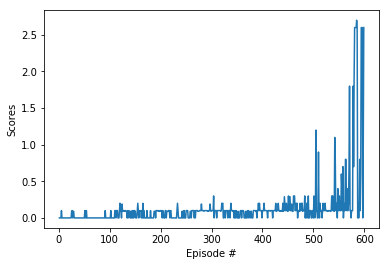

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')
plt.show()